In [32]:
import sys
sys.path.insert(1, '/Users/brune/Software/pygplates/pygplates_latest')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

# %reset # clears all variables
%matplotlib inline

import os
print os.getcwd()

/Users/brune/_prog/pygplates/09_Rifts_SengorNatalin


In [33]:
save_yn = 1
save_animation_yn = 1
annotate_maps_yn = 1

tStart=450
#tStart=5

AnalysisTimeStep = 1 
AnimationTimeStep = 1

#OutputFolder = './00_Full_1MyBins/'
#OutputFolder = './01_NoMargins_IncludingOverlappingRifts/'
#OutputFolder = './05_NoMargins_ExcludingOverlappingRifts/'
#OutputFolder = './05a_NoMargins_ExcludingOverlappingRifts_redo/'
#OutputFolder = './05b_NoMargins_ExcludingOverlappingRifts_InclWANT_250/'
#OutputFolder = './05c_NoMargins_ExcludingOverlappingRifts_ExclWANT_200_ForFigure/'
#OutputFolder = './01b_NoMargins_IncludingOverlappingRifts_450Ma/'
OutputFolder = './00_Full_Analysis1My_Animation1My_250Ma/'

if not os.access(OutputFolder, os.F_OK):
    os.makedirs(OutputFolder)

# load database
rifts_df = pd.read_csv('./_input/rifts_sb.csv')


### Assign time and end times in Ma

In [34]:
ts = pd.read_csv('./_input/TimescaleHierarchy.csv')

def AgeRangeFromString(age_string):
    #age_string = 'Late Miocene'
    subset = ts.where(ts.Age.str.match(age_string,case=False) | 
                      ts.SubEpoch.str.match(age_string,case=False) | 
                      ts.Epoch.str.match(age_string,case=False) | 
                      ts.Period.str.match(age_string,case=False)).dropna()

    age_range = (np.min(subset.End_Ma),np.max(subset.Start_Ma))
    
    return age_range

amax = []
amin = []

for index,rift in rifts_df.iterrows():
    ar1 = (np.nan,np.nan) # age range start
    ar2 = (np.nan,np.nan) # age range end
    
    if pd.notnull(rift.Old_Age):
        ar1 = AgeRangeFromString(rift.Old_Age)
        if np.isnan(ar1[0]):
            # This is supposed to catch entries whose age name does not match anything
            # in the list
            print 'no match for %s' % rift.Old_Age
            print rift.Region + rift.ID + ': Old_Age ' + rift.Old_Age
        #print rift.Region + rift.ID + ': Old_Age ' + rift.Old_Age + '. ar1[0] ' + str(ar1[0])+ '. ar1[1] ' + str(ar1[1])  
    
    if pd.notnull(rift.Young_Age):
        ar2 = AgeRangeFromString(rift.Young_Age)
        #print rift.Region + rift.ID + ': Young_Age ' + rift.Young_Age + '. ar2[0] ' + str(ar2[0])+ '. ar2[1] ' + str(ar2[1])  
        
    #print (ar1[1],ar2[1])
    tmp1 = np.nanmax([ar1,ar2])
    tmp2 = np.nanmin([ar1,ar2])
    amax.append(tmp1)
    amin.append(tmp2)
    
    #print rift.Old_Age,rift.Young_Age,ar1,ar2,tmp1,tmp2
rifts_df['Old_Age_Ma'] = pd.Series(amax)
rifts_df['Young_Age_Ma'] = pd.Series(amin)

#rifts_df

### Change index per hand

In [35]:
#rifts_df.where(rifts_df.Name == 'North Chukchi').Long_Min = 179

# get a list of indeces that fulfill a logigalc expression
i = rifts_df[ rifts_df.Name == 'North Chukchi' ].index.tolist()

# print row of index i
print 'Before:'
print rifts_df.iloc[i]

# set a specific value
rifts_df.set_value(i,'Long_Min',165)

# check if it worked
print 'After:'
print rifts_df.iloc[i]


Before:
    Region  ID  Long_Min  Long_Max  Lat_Min  Lat_Max Orientation  \
205   EEUR  67    -170.0     150.0     74.0     79.0     285,315   

              Name  Length  Width          Old_Age  Young_Age  \
205  North Chukchi    1300  300.0  Late Cretaceous  Paleogene   

    Kinematic_Type_1 Geometric_Type_1 Kinematic_Type_2 Geometric_Type_2  \
205              k22               g3              NaN              NaN   

     Old_Age_Ma  Young_Age_Ma  
205       100.5         23.03  
After:
    Region  ID  Long_Min  Long_Max  Lat_Min  Lat_Max Orientation  \
205   EEUR  67     165.0     150.0     74.0     79.0     285,315   

              Name  Length  Width          Old_Age  Young_Age  \
205  North Chukchi    1300  300.0  Late Cretaceous  Paleogene   

    Kinematic_Type_1 Geometric_Type_1 Kinematic_Type_2 Geometric_Type_2  \
205              k22               g3              NaN              NaN   

     Old_Age_Ma  Young_Age_Ma  
205       100.5         23.03  


# Use only specific rows from DataFrame

### Define the  list of indeces that are discarded
### This List excludes EARS, Red Sea, CARS, WARS from the analysis (from Antarctica, all is in except Weddell).

In [36]:
# This excludes nothing. It is only needed for not breaking the code.

In [37]:
# './00_Full_Analysis1My_Animation5My_450Ma/'

WEUR_out=['']
EEUR_out=['']
AFR_out=['']
MAD_out=['']
AUS_out=['']
NZ_out=['']
NAM_out=['']
CAM_out=['']
SAM_out=['']
ANT_out=['']

### This List excludes EARS, Red Sea, CARS, WARS, Antarctica from the analysis.

### Define the  list of indeces that are discarded
### This List keeps EARS, Red Sea, CARS, WARS, Antarctica within the analysis

### get rid of rifts that are older than start time

In [38]:
rifts_df = rifts_df.where(rifts_df.Young_Age_Ma<tStart)

### 2a pick South Atlantic, only Africa

### 2b pick South Atlantic, only SAmerica

### 3a pick North Atlantic, only Europe

### 3b pick North Atlantic, only NAmerica

### 4a pick Central Atlantic, only Africa

### 4b pick Central Atlantic, only NAmerica

### get rid of rifts that we already have in the GPlates rift database
### this has to be turned on for generatgin the csv file (turn it off only for generating Fig of the paper)

In [39]:
rifts_df = rifts_df.where( (rifts_df.Region.str.contains('WEUR')) & ~rifts_df.ID.isin(WEUR_out) |
                         (rifts_df.Region.str.contains('EEUR')) & ~rifts_df.ID.isin(EEUR_out) |
                         (rifts_df.Region.str.contains('AFR'))  & ~rifts_df.ID.isin(AFR_out) |
                         (rifts_df.Region.str.contains('MAD'))  & ~rifts_df.ID.isin(MAD_out) |
                         (rifts_df.Region.str.contains('AUS'))  & ~rifts_df.ID.isin(AUS_out) |
                         (rifts_df.Region.str.contains('NZ'))   & ~rifts_df.ID.isin(NZ_out) |
                         (rifts_df.Region.str.contains('NAM'))  & ~rifts_df.ID.isin(NAM_out) |
                         (rifts_df.Region.str.contains('CAM'))  & ~rifts_df.ID.isin(CAM_out) |
                         (rifts_df.Region.str.contains('SAM'))  & ~rifts_df.ID.isin(SAM_out) |
                         (rifts_df.Region.str.contains('ANT'))  & ~rifts_df.ID.isin(ANT_out)   
                       ) 

#print rifts_df

#rifts_df = rifts_df.where(rifts_df.Length>500)
#rifts_df = rifts_df[np.isfinite(rifts_df['Region'])]
#rifts_df = rifts_df[pd.notnull(rifts_df['Region'])]
#rifts_df

### Select rifts according to kinematics

### Select rifts according to geometry

### Order Rifts by Time Period

### Sort the rifts by age (young end of age range), then plot age range of each

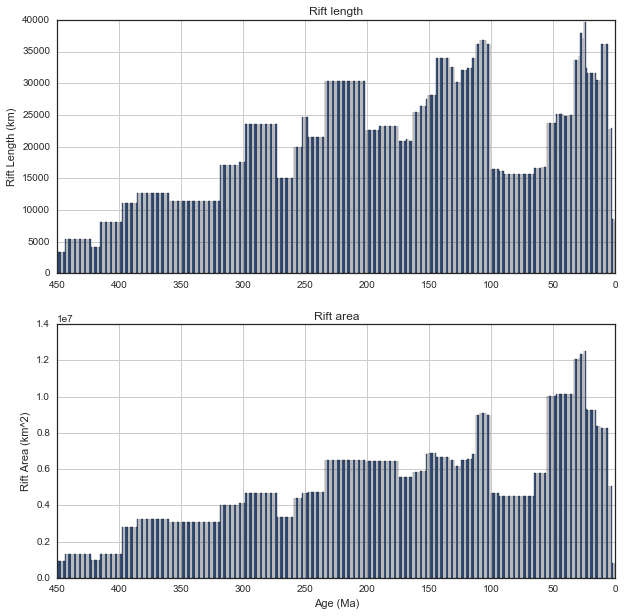

In [40]:
#time_step = 1
time_max = tStart
time_step = AnalysisTimeStep
time_bins = np.arange(0,time_max+1,time_step)

summed_length = []
summed_area = []

for time in time_bins:
    #print time,time+time_step
    subset = rifts_df.where((rifts_df.Old_Age_Ma>time) & (rifts_df.Young_Age_Ma<=time)) 
    #print subset
    summed_length.append(np.nansum(subset.Length))
    summed_area.append(np.nansum(subset.Length*subset.Width))


plt.figure(figsize=(10,10))

plt.subplot(211)
plt.bar(time_bins,summed_length,time_step*0.5)
plt.xlim((time_max,0))
plt.grid()
plt.ylabel('Rift Length (km)')
plt.title('Rift length')

plt.subplot(212)
plt.bar(time_bins,summed_area,time_step*0.5)
plt.xlim((time_max,0))
plt.grid()
plt.ylabel('Rift Area (km^2)')
plt.xlabel('Age (Ma)')
plt.title('Rift area')

plt.show()



In [41]:
#sb save rift length to file
if save_yn:
    # prepare data
    data = np.transpose( np.vstack( (time_bins,summed_length) ) )
    # save
    outputFile = OutputFolder + './Sengor_RiftLengthBinned.csv'
    np.savetxt(outputFile, data, delimiter=',',fmt='%1.1f')
    print 'Saved to file: ' + outputFile

Saved to file: ./00_Full_Analysis1My_Animation1My_250Ma/./Sengor_RiftLengthBinned.csv


### Plot the rift lengths as an area plot, divided by Sengors kinematic type

Figure saved.


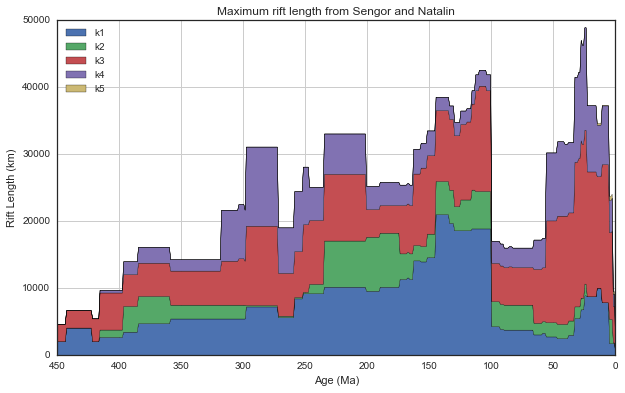

In [42]:
k1_in=['k1']
k2_in=['k2','k21','k22']
k3_in=['k3','k31','k32','k33']
k4_in=['k4','k41','k42','k411','k412','k413','k42','k421','k422','k423']
k5_in=['k5']

summed_length_k1 = []
summed_length_k2 = []
summed_length_k3 = []
summed_length_k4 = []
summed_length_k5 = []

for time in time_bins:
    subset = rifts_df.where( (rifts_df.Old_Age_Ma>=time) & (rifts_df.Young_Age_Ma<time) 
                           & (rifts_df.Kinematic_Type_1.isin(k1_in) | rifts_df.Kinematic_Type_2.isin(k1_in)) )
    summed_length_k1.append(np.nansum(subset.Length))
    subset = rifts_df.where( (rifts_df.Old_Age_Ma>=time) & (rifts_df.Young_Age_Ma<time) 
                           & (rifts_df.Kinematic_Type_1.isin(k2_in) | rifts_df.Kinematic_Type_2.isin(k2_in)) )
    summed_length_k2.append(np.nansum(subset.Length))
    subset = rifts_df.where( (rifts_df.Old_Age_Ma>=time) & (rifts_df.Young_Age_Ma<time) 
                           & (rifts_df.Kinematic_Type_1.isin(k3_in) | rifts_df.Kinematic_Type_2.isin(k3_in)) )
    summed_length_k3.append(np.nansum(subset.Length))
    subset = rifts_df.where( (rifts_df.Old_Age_Ma>=time) & (rifts_df.Young_Age_Ma<time) 
                           & (rifts_df.Kinematic_Type_1.isin(k4_in) | rifts_df.Kinematic_Type_2.isin(k4_in)) )
    summed_length_k4.append(np.nansum(subset.Length))
    subset = rifts_df.where( (rifts_df.Old_Age_Ma>=time) & (rifts_df.Young_Age_Ma<time) 
                           & (rifts_df.Kinematic_Type_1.isin(k5_in) | rifts_df.Kinematic_Type_2.isin(k5_in)) )
    summed_length_k5.append(np.nansum(subset.Length))

st = np.row_stack((summed_length_k1,
                  summed_length_k2,
                  summed_length_k3,
                  summed_length_k4,
                  summed_length_k5))

plt.figure(figsize=(10,6))

plt.stackplot(time_bins,st)

plt.legend(['k1','k2','k3','k4','k5'],loc='upper left')

plt.xlim((time_max,0))
plt.grid()
plt.ylabel('Rift Length (km)')
plt.xlabel('Age (Ma)')
plt.title('Maximum rift length from Sengor and Natalin')

if save_yn:
    plt.savefig(OutputFolder + 'kinematic_division.png')
    print 'Figure saved.'
    
plt.show()
plt.close()


### Plot the rift lengths as an area plot, divided by Sengors geometric type

Figure saved.


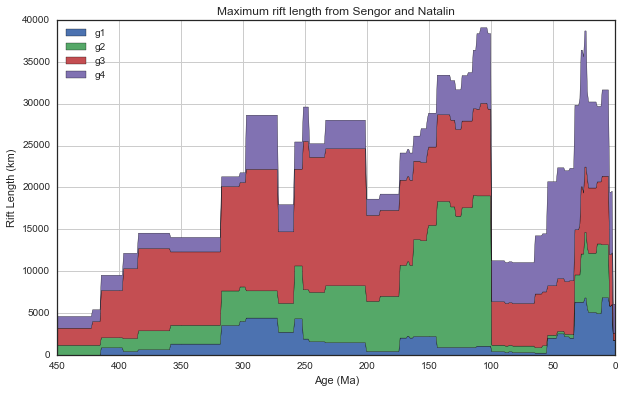

In [43]:
g1_in=['g1']
g2_in=['g2']
g3_in=['g3']
g4_in=['g4']

summed_length_g1 = []
summed_length_g2 = []
summed_length_g3 = []
summed_length_g4 = []

for time in time_bins:
    subset = rifts_df.where( (rifts_df.Old_Age_Ma>time) & (rifts_df.Young_Age_Ma<=time) 
                           & (rifts_df.Geometric_Type_1.isin(g1_in) | rifts_df.Geometric_Type_2.isin(g1_in)) )
    summed_length_g1.append(np.nansum(subset.Length))
    subset = rifts_df.where( (rifts_df.Old_Age_Ma>time) & (rifts_df.Young_Age_Ma<=time) 
                           & (rifts_df.Geometric_Type_1.isin(g2_in) | rifts_df.Geometric_Type_2.isin(g2_in)) )
    summed_length_g2.append(np.nansum(subset.Length))
    subset = rifts_df.where( (rifts_df.Old_Age_Ma>time) & (rifts_df.Young_Age_Ma<=time) 
                           & (rifts_df.Geometric_Type_1.isin(g3_in) | rifts_df.Geometric_Type_2.isin(g3_in)) )
    summed_length_g3.append(np.nansum(subset.Length))
    subset = rifts_df.where( (rifts_df.Old_Age_Ma>time) & (rifts_df.Young_Age_Ma<=time) 
                           & (rifts_df.Geometric_Type_1.isin(g4_in) | rifts_df.Geometric_Type_2.isin(g4_in)) )
    summed_length_g4.append(np.nansum(subset.Length))

st = np.row_stack((summed_length_g1,
                  summed_length_g2,
                  summed_length_g3,
                  summed_length_g4))

plt.figure(figsize=(10,6))

plt.stackplot(time_bins,st)

plt.legend(['g1','g2','g3','g4'],loc='upper left')

plt.xlim((time_max,0))
plt.grid()
plt.ylabel('Rift Length (km)')
plt.xlabel('Age (Ma)')
plt.title('Maximum rift length from Sengor and Natalin')

if save_yn:
    plt.savefig(OutputFolder + 'geometric_division.png')
    print 'Figure saved.'
    
plt.show()
plt.close()




### Plot the rift lengths as an area plot, divided by continents

['WEUR' 'EEUR' nan 'AFR' 'MAD' 'AUS' 'NZ' 'NAM' 'CAM' 'SAM' 'ANT']
Figure saved.


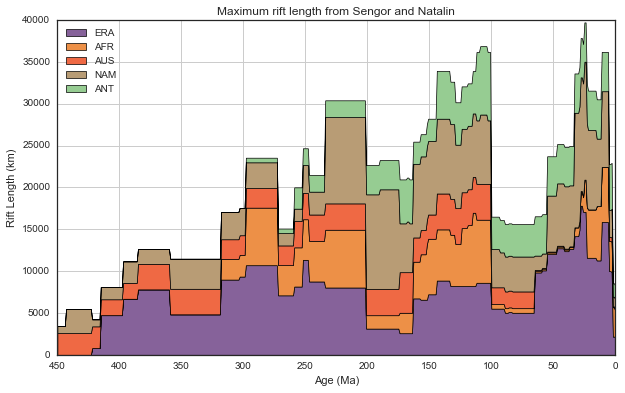

In [44]:
print rifts_df.Region.unique()

summed_length_Eurasia = [] # east and west eurasia
summed_length_Africa = [] # africa and madagascar
summed_length_Australia = [] # includes New Zealand
summed_length_America = [] # includes north. south & central america
summed_length_Antarctica = []

for time in time_bins:
    subset = rifts_df.where((rifts_df.Old_Age_Ma>time) & (rifts_df.Young_Age_Ma<=time) 
                           & ((rifts_df.Region=='WEUR') | (rifts_df.Region=='EEUR')))
    summed_length_Eurasia.append(np.nansum(subset.Length))
    subset = rifts_df.where((rifts_df.Old_Age_Ma>time) & (rifts_df.Young_Age_Ma<=time) 
                           & ((rifts_df.Region=='AFR') | (rifts_df.Region=='MAD')))
    summed_length_Africa.append(np.nansum(subset.Length))
    subset = rifts_df.where((rifts_df.Old_Age_Ma>time) & (rifts_df.Young_Age_Ma<=time) 
                           & ((rifts_df.Region=='AUS') | (rifts_df.Region=='NZ')))
    summed_length_Australia.append(np.nansum(subset.Length))
    subset = rifts_df.where((rifts_df.Old_Age_Ma>time) & (rifts_df.Young_Age_Ma<=time) 
                           & ((rifts_df.Region=='NAM') | (rifts_df.Region=='CAM') | (rifts_df.Region=='SAM')))
    summed_length_America.append(np.nansum(subset.Length))
    subset = rifts_df.where((rifts_df.Old_Age_Ma>time) & (rifts_df.Young_Age_Ma<=time) 
                           & (rifts_df.Region=='ANT'))
    summed_length_Antarctica.append(np.nansum(subset.Length))

st = np.row_stack((summed_length_Eurasia,
                  summed_length_Africa,
                  summed_length_Australia,
                  summed_length_America,
                  summed_length_Antarctica))

plt.figure(figsize=(10,6))

tmpColor = seaborn.color_palette('Paired_r',n_colors=5) # provides only a limited number of discrete colors

plt.stackplot(time_bins,st, colors=tmpColor, linewidth=0.7)

plt.legend(['ERA','AFR','AUS','NAM','ANT'],loc='upper left')

plt.xlim((time_max,0))
plt.grid()
plt.ylabel('Rift Length (km)')
plt.xlabel('Age (Ma)')
plt.title('Maximum rift length from Sengor and Natalin')

if save_yn:
    plt.savefig(OutputFolder + 'regional_division.png')
    print 'Figure saved.'
    
plt.show()
plt.close()


### Save  rift length for each continent. In MarginParameter Format for easy reading in StackplotMarginParameters_12.py

In [45]:
print time_bins
print time_bins[::-1]
       
#sb save rift length to file
if save_yn:
    # Eurasia (reverse time order))
    data_Eurasia = np.transpose( np.vstack( (time_bins[::-1],summed_length_Eurasia[::-1],time_bins[::-1],time_bins[::-1]) ) )
    continentFolder = OutputFolder + 'Eurasia/'
    if not os.access(continentFolder, os.F_OK):
        os.makedirs(continentFolder)
    np.savetxt(continentFolder + '_MarginParameter.csv', data_Eurasia, delimiter=',',fmt='%1.1f')
    print 'Saved to ' + continentFolder
    
    # Africa (reverse time order))
    data_Africa = np.transpose( np.vstack( (time_bins[::-1],summed_length_Africa[::-1],time_bins[::-1],time_bins[::-1]) ) )
    continentFolder = OutputFolder + 'Africa/'
    if not os.access(continentFolder, os.F_OK):
        os.makedirs(continentFolder)
    np.savetxt(continentFolder + '_MarginParameter.csv', data_Africa, delimiter=',',fmt='%1.1f')
    print 'Saved to ' + continentFolder
    
    # Australia (reverse time order))
    data_Australia = np.transpose( np.vstack( (time_bins[::-1],summed_length_Australia[::-1],time_bins[::-1],time_bins[::-1]) ) )
    continentFolder = OutputFolder + 'Australia/'
    if not os.access(continentFolder, os.F_OK):
        os.makedirs(continentFolder)
    np.savetxt(continentFolder + '_MarginParameter.csv', data_Australia, delimiter=',',fmt='%1.1f')
    print 'Saved to ' + continentFolder
    
    # America (reverse time order))
    data_America = np.transpose( np.vstack( (time_bins[::-1],summed_length_America[::-1],time_bins[::-1],time_bins[::-1]) ) )
    continentFolder = OutputFolder + 'America/'
    if not os.access(continentFolder, os.F_OK):
        os.makedirs(continentFolder)
    np.savetxt(continentFolder + '_MarginParameter.csv', data_America, delimiter=',',fmt='%1.1f')
    print 'Saved to ' + continentFolder
    
    # Antarctica (reverse time order))
    data_Antarctica = np.transpose( np.vstack( (time_bins[::-1],summed_length_Antarctica[::-1],time_bins[::-1],time_bins[::-1]) ) )
    continentFolder = OutputFolder + 'Antarctica/'
    if not os.access(continentFolder, os.F_OK):
        os.makedirs(continentFolder)
    np.savetxt(continentFolder + '_MarginParameter.csv', data_Antarctica, delimiter=',',fmt='%1.1f')
    print 'Saved to ' + continentFolder

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

### Regional Classification (SengÃ¶rs Regions)

[(0.91843137741088854, 0.8264052311579384, 0.48183008432388291), (0.72732026378313708, 0.64496732056140904, 0.60183008909225466), (0.49098039865493787, 0.33098039627075215, 0.6509804129600526), (0.76705883542696629, 0.66745099723339085, 0.82352942228317261), (0.93071895837783813, 0.56470588843027758, 0.27973856528600083), (0.99686274528503416, 0.59843137860298146, 0.17411764860153181), (0.97856209278106698, 0.6627451111872994, 0.39189542829990404), (0.90379085540771487, 0.18823529730240518, 0.15320261567831045), (0.94666666984558101, 0.40313726961612689, 0.40392158329486832), (0.72287581861019168, 0.61176472902297974, 0.45751635730266588), (0.7254901960784313, 0.5764705882352941, 0.49411764705882355), (0.59843138754367842, 0.82509804964065558, 0.46745100319385541), (0.5607843137254902, 0.6941176470588235, 0.9882352941176471), (0.11764705882352941, 0.3137254901960784, 0.7843137254901961)]
TODO: STRONG COLORS TO THE BOTTOM & PALE COLORS MORE PALE, ASSIGN  BY HAND!
Figure saved.


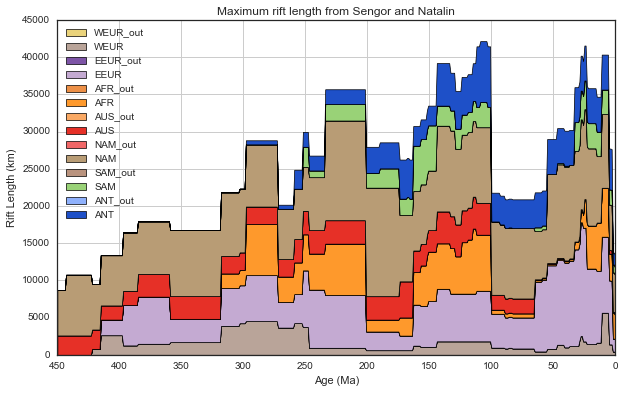

In [46]:
import seaborn
seaborn.set_style('white') # darkgrid, whitegrid, dark, white, and ticks. 

time_step = AnalysisTimeStep
time_max = tStart
time_bins = np.arange(0,time_max+1,time_step)

### prepare data
# generate data frame of rifts that are already included in our pygplates analysis
rifts_df_out = rifts_df.where( (rifts_df.Region.str.contains('WEUR')) & rifts_df.ID.isin(WEUR_out) |
                         (rifts_df.Region.str.contains('EEUR')) & rifts_df.ID.isin(EEUR_out) |
                         (rifts_df.Region.str.contains('AFR'))  & rifts_df.ID.isin(AFR_out) |
                         (rifts_df.Region.str.contains('MAD'))  & rifts_df.ID.isin(MAD_out) |
                         (rifts_df.Region.str.contains('AUS'))  & rifts_df.ID.isin(AUS_out) |
                         (rifts_df.Region.str.contains('NZ'))   & rifts_df.ID.isin(NZ_out) |
                         (rifts_df.Region.str.contains('NAM'))  & rifts_df.ID.isin(NAM_out) |
                         (rifts_df.Region.str.contains('CAM'))  & rifts_df.ID.isin(CAM_out) |
                         (rifts_df.Region.str.contains('SAM'))  & rifts_df.ID.isin(SAM_out) |
                         (rifts_df.Region.str.contains('ANT'))  & rifts_df.ID.isin(ANT_out)   
                       )

# rift length that are already included in our pygplates analysis
summed_length_WesternEurope_out = []
summed_length_EasternEurope_out = []
summed_length_Africa_out = []
summed_length_Australia_out = []
summed_length_NorthAmerica_out = []
summed_length_SouthAmerica_out = []
summed_length_Antarctica_out = []

for time in time_bins:
    subset = rifts_df_out.where((rifts_df_out.Old_Age_Ma>time) & (rifts_df_out.Young_Age_Ma<=time) 
                           & (rifts_df_out.Region=='WEUR'))
    summed_length_WesternEurope_out.append(np.nansum(subset.Length))
    subset = rifts_df_out.where((rifts_df_out.Old_Age_Ma>time) & (rifts_df_out.Young_Age_Ma<=time) 
                           & (rifts_df_out.Region=='EEUR'))
    summed_length_EasternEurope_out.append(np.nansum(subset.Length))
    subset = rifts_df_out.where((rifts_df_out.Old_Age_Ma>time) & (rifts_df_out.Young_Age_Ma<=time) 
                           & ((rifts_df_out.Region=='AFR') | (rifts_df.Region=='AFR')))
    summed_length_Africa_out.append(np.nansum(subset.Length))
    subset = rifts_df_out.where((rifts_df_out.Old_Age_Ma>time) & (rifts_df_out.Young_Age_Ma<=time) 
                           & ((rifts_df_out.Region=='AUS') | (rifts_df_out.Region=='NZ')))
    summed_length_Australia_out.append(np.nansum(subset.Length))
    subset = rifts_df_out.where((rifts_df_out.Old_Age_Ma>time) & (rifts_df_out.Young_Age_Ma<=time) 
                           & (rifts_df.Region=='NAM') | (rifts_df.Region=='CAM'))
    summed_length_NorthAmerica_out.append(np.nansum(subset.Length))
    subset = rifts_df_out.where((rifts_df_out.Old_Age_Ma>time) & (rifts_df_out.Young_Age_Ma<=time) 
                           & (rifts_df_out.Region=='SAM'))
    summed_length_SouthAmerica_out.append(np.nansum(subset.Length))
    subset = rifts_df_out.where((rifts_df_out.Old_Age_Ma>time) & (rifts_df_out.Young_Age_Ma<=time) 
                           & (rifts_df_out.Region=='ANT'))
    summed_length_Antarctica_out.append(np.nansum(subset.Length))

    
# rift length that are not included in our pygplates analysis
summed_length_WesternEurope = []
summed_length_EasternEurope = []
summed_length_Africa = []
summed_length_Australia = []
summed_length_NorthAmerica = []
summed_length_CentralAmerica = []
summed_length_SouthAmerica = []
summed_length_Antarctica = []

for time in time_bins:
    subset = rifts_df.where((rifts_df.Old_Age_Ma>time) & (rifts_df.Young_Age_Ma<=time) 
                           & (rifts_df.Region=='WEUR'))
    summed_length_WesternEurope.append(np.nansum(subset.Length))
    subset = rifts_df.where((rifts_df.Old_Age_Ma>time) & (rifts_df.Young_Age_Ma<=time) 
                           & (rifts_df.Region=='EEUR'))
    summed_length_EasternEurope.append(np.nansum(subset.Length))
    subset = rifts_df.where((rifts_df.Old_Age_Ma>time) & (rifts_df.Young_Age_Ma<=time) 
                           & ((rifts_df.Region=='AFR') | (rifts_df.Region=='AFR')))
    summed_length_Africa.append(np.nansum(subset.Length))
    subset = rifts_df.where((rifts_df.Old_Age_Ma>time) & (rifts_df.Young_Age_Ma<=time) 
                           & ((rifts_df.Region=='AUS') | (rifts_df.Region=='NZ')))
    summed_length_Australia.append(np.nansum(subset.Length))
    subset = rifts_df.where((rifts_df.Old_Age_Ma>time) & (rifts_df.Young_Age_Ma<=time) 
                           & (rifts_df.Region=='NAM') | (rifts_df.Region=='CAM'))
    summed_length_NorthAmerica.append(np.nansum(subset.Length))
    subset = rifts_df.where((rifts_df.Old_Age_Ma>time) & (rifts_df.Young_Age_Ma<=time) 
                           & (rifts_df.Region=='SAM'))
    summed_length_SouthAmerica.append(np.nansum(subset.Length))
    subset = rifts_df.where((rifts_df.Old_Age_Ma>time) & (rifts_df.Young_Age_Ma<=time) 
                           & (rifts_df.Region=='ANT'))
    summed_length_Antarctica.append(np.nansum(subset.Length))
    
st = np.row_stack((summed_length_WesternEurope,
                  summed_length_EasternEurope,summed_length_Africa,
                  summed_length_Australia,
                  summed_length_NorthAmerica,
                  summed_length_SouthAmerica,
                  summed_length_Antarctica))

### prepare array
RLength =                    summed_length_WesternEurope_out
RLength = np.vstack((RLength,summed_length_WesternEurope))
RLength = np.vstack((RLength,summed_length_EasternEurope_out))
RLength = np.vstack((RLength,summed_length_EasternEurope))
RLength = np.vstack((RLength,summed_length_Africa_out))
RLength = np.vstack((RLength,summed_length_Africa))
RLength = np.vstack((RLength,summed_length_Australia_out))
RLength = np.vstack((RLength,summed_length_Australia))
RLength = np.vstack((RLength,summed_length_NorthAmerica_out))
RLength = np.vstack((RLength,summed_length_NorthAmerica))
RLength = np.vstack((RLength,summed_length_SouthAmerica_out))
RLength = np.vstack((RLength,summed_length_SouthAmerica))
RLength = np.vstack((RLength,summed_length_Antarctica_out))
RLength = np.vstack((RLength,summed_length_Antarctica))

### plot figure
plt.figure(figsize=(10,6))

FileNumber=16
tmpColor = seaborn.color_palette('Paired_r',n_colors=14) # provides only a limited number of discrete colors
tmpColor[10]=(185.0/255, 147.0/255, 126.0/255)
tmpColor[12]=(143.0/255, 177.0/255, 252.0/255)
tmpColor[13]=(30.0/255, 80.0/255, 200.0/255)

print tmpColor
#NewColor = seaborn.blend_palette(tmpColor, n_colors=FileNumber+1) # interpolating between discrete colors

Time = time_bins
plt.stackplot(Time,RLength, colors=tmpColor, linewidth=0.7)
#plt.stackplot(Time,RLength, colors=[(0.1,0.1,0.1), (0.8,0.8,0.8)], linewidth=0.7)

#plt.stackplot(time_bins,st)

plt.legend(['WEUR_out','WEUR','EEUR_out','EEUR','AFR_out','AFR','AUS_out','AUS','NAM_out','NAM','SAM_out','SAM','ANT_out','ANT',],loc='upper left')

print 'TODO: STRONG COLORS TO THE BOTTOM & PALE COLORS MORE PALE, ASSIGN  BY HAND!'

plt.xlim((time_max,0))
plt.grid()
plt.ylabel('Rift Length (km)')
plt.xlabel('Age (Ma)')
plt.title('Maximum rift length from Sengor and Natalin')

if save_yn:
    plt.savefig(OutputFolder + 'regional_division_inout.png')
    print 'Figure saved.'
    
plt.show()
plt.close()



In [47]:
print tmpColor[11]

(0.59843138754367842, 0.82509804964065558, 0.46745100319385541)


### Figure 1b

Figure saved.


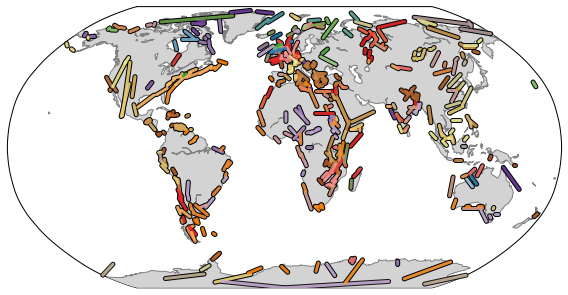

In [48]:
from mpl_toolkits.basemap import Basemap

import nvector as nv
#from mpltools import color

fig = plt.figure(figsize=(8,5))
df = rifts_df

m = Basemap(projection='robin', lon_0=0, resolution='c')
m.drawcoastlines(color='gray')
m.fillcontinents(color='lightgray')
ax = plt.gca()

AgeMax = tStart

for index,row in df.iterrows():
    if row.Young_Age_Ma<tStart:
        point_latitude = np.nanmean((row.Lat_Min,row.Lat_Max))
        point_longitude = np.nanmean((row.Long_Min,row.Long_Max))
        orientation = row.Orientation
        rift_length = row.Length
        rift_age = np.nanmean((row.Old_Age_Ma,row.Young_Age_Ma))

        #print orientation
        tmp = []
        if type(orientation)==str:
            for o in orientation.split(','):
                if type(o)==float:
                    tmp.append(o)
                elif o=='N':
                    tmp.append(0.)
                elif o=='NNE':
                    tmp.append(22.5)
                elif o=='NE':
                    tmp.append(45.)
                elif o=='ENE':
                    tmp.append(67.5)
                elif o=='E':
                    tmp.append(90.)
                elif o=='ESE':
                    tmp.append(112.5)
                elif o=='SE':
                    tmp.append(135.)
                elif o=='SSE':
                    tmp.append(157.5)
                elif o=='S':
                    tmp.append(180.)
                elif o=='SSW':
                    tmp.append(202.5)
                elif o=='SW':
                    tmp.append(225.)
                elif o=='WSW':
                    tmp.append(247.5)
                elif o=='W':
                    tmp.append(270.)
                elif o=='WNW':
                    tmp.append(292.5)
                elif o=='NW':
                    tmp.append(315.)
                elif o=='NNW':
                    tmp.append(337.5)
                else:
                    tmp.append(float(o))
            #print tmp

            x = y = 0
            for angle in tmp:
                x += np.cos(np.radians(angle))
                y += np.sin(np.radians(angle))

            average_angle = np.degrees(np.arctan2(y, x))
            #print average_angle
            
            frame = nv.FrameE(a=6371, f=0)
            pointA = frame.GeoPoint(latitude=point_latitude, longitude=point_longitude, degrees=True)
            pointB, _azimuthb = pointA.geo_point(distance=float(rift_length)/2., azimuth=average_angle,degrees=True)
            lat1, lon1 = pointB.latitude_deg, pointB.longitude_deg
            #print rift_length
            #print lat,lon,point_latitude,point_longitude
            pointB, _azimuthb = pointA.geo_point(distance=float(rift_length)/2., azimuth=average_angle+180.,degrees=True)
            lat2, lon2 = pointB.latitude_deg, pointB.longitude_deg

            color = plt.cm.Paired_r(rift_age/AgeMax)
            
            # if the rift is already in our own analysis, it doesn't get a black jacket
            black_yn = ( (row.Region=='WEUR') & (row.ID not in WEUR_out) |
                         (row.Region=='EEUR') & (row.ID not in EEUR_out) |
                         (row.Region=='AFR')  & (row.ID not in AFR_out) |
                         (row.Region=='MAD')  & (row.ID not in MAD_out) |
                         (row.Region=='AUS')  & (row.ID not in AUS_out) |
                         (row.Region=='NZ')   & (row.ID not in NZ_out) |
                         (row.Region=='NAM')  & (row.ID not in NAM_out) |
                         (row.Region=='CAM')  & (row.ID not in CAM_out) |
                         (row.Region=='SAM')  & (row.ID not in SAM_out) |
                         (row.Region=='ANT')  & (row.ID not in ANT_out)   
                       ) 

            if row.Name == 'Ross Sea':
                x,y = m([lon1,-180.],[lat1,np.mean((lat1,lat2))])
                m.plot(x,y,linewidth=3,alpha=0.9,color=color,zorder=3)
                x,y = m([lon2,180.],[lat2,np.mean((lat1,lat2))])
                m.plot(x,y,linewidth=3,alpha=0.9,color=color,zorder=3)
                if black_yn:
                    x,y = m([lon1,-180.],[lat1,np.mean((lat1,lat2))])
                    m.plot(x,y,linewidth=5,alpha=0.9,color='k',zorder=2)
                    x,y = m([lon2,180.],[lat2,np.mean((lat1,lat2))])
                    m.plot(x,y,linewidth=5,alpha=0.9,color='k',zorder=2)
            elif row.Name == 'Polar':
                x,y = m([lon1,0.],[lat1,-90])
                m.plot(x,y,linewidth=3,alpha=0.9,color=color,zorder=3)
                x,y = m([lon2,0.],[lat2,-90])
                m.plot(x,y,linewidth=3,alpha=0.9,color=color,zorder=3)
                if black_yn:
                    x,y = m([lon1,0.],[lat1,-90])
                    m.plot(x,y,linewidth=5,alpha=0.9,color='k',zorder=2)
                    x,y = m([lon2,0.],[lat2,-90])
                    m.plot(x,y,linewidth=5,alpha=0.9,color='k',zorder=2)
            else:
                x,y = m([lon1,lon2],[lat1,lat2])
                plothandle = m.plot(x,y,linewidth=3,alpha=0.9,color=color,zorder=3)
                if black_yn:
                    m.plot(x,y,'k',linewidth=5,zorder=2)
                #ax.annotate(row.Name,(x[0],y[0]),horizontalalignment='center',verticalalignment='center')
'''
if annotate_maps_yn:
    rift_Id = np.hstack(rifts_df.ID)
    for i, txt in enumerate(rift_Id):
        ax.annotate(txt, (x[i],y[i]),horizontalalignment='center',verticalalignment='center')
'''


if save_yn:
    plt.tight_layout()
    plt.savefig(OutputFolder + 'Rifts-of-the-world-sb3_Lines.png', dpi=200)
    print 'Figure saved.'

plt.show()
plt.close()



657
Figure saved.


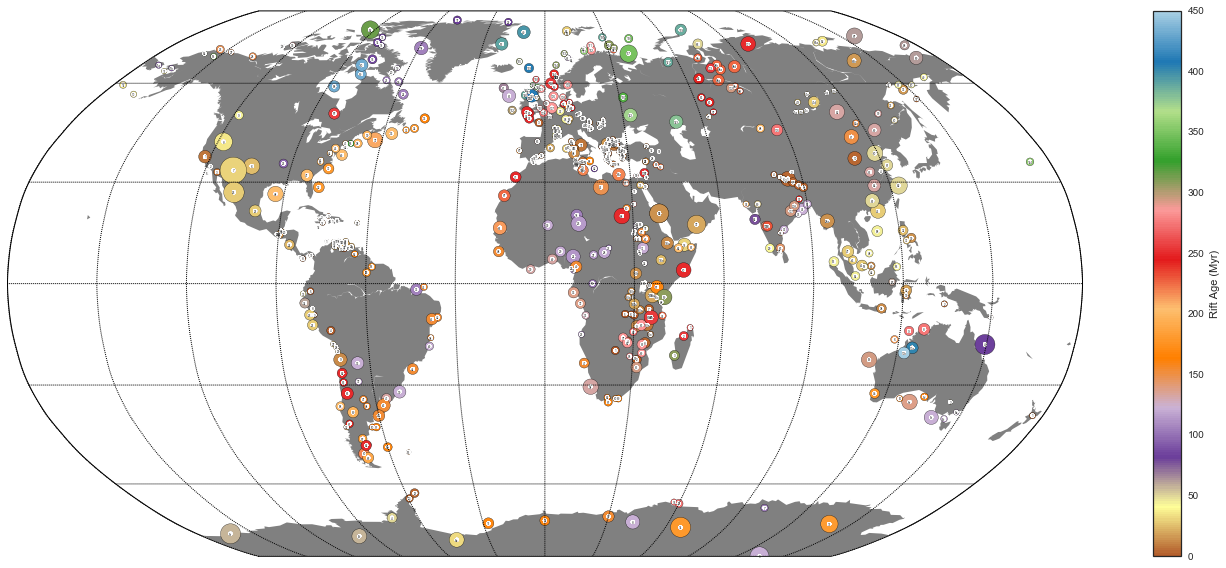

In [49]:
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(20,8))

m = Basemap(projection='robin', resolution='c', lat_0=0, lon_0=0)
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='grey', lake_color='white', zorder=0)
m.drawmeridians(np.arange(0, 360, 30))
m.drawparallels(np.arange(-90, 90, 30))
ax = plt.gca()

# Get the position and colour for the rift points, by taking the average longitude, latitude and age
rift_long = np.nanmean(np.vstack((rifts_df.Long_Min,rifts_df.Long_Max)),axis=0)
rift_lat = np.nanmean(np.vstack((rifts_df.Lat_Min,rifts_df.Lat_Max)),axis=0)
rift_age = np.nanmean(np.vstack((rifts_df.Old_Age_Ma,rifts_df.Young_Age_Ma)),axis=0)

x,y = m(rift_long,rift_lat)
#print x,y
print np.size(x)

handle = m.scatter(x,y,s=rifts_df.Length/5,c=rift_age,vmin=0,vmax=tStart,cmap='Paired_r')

plt.colorbar(handle,label='Rift Age (Myr)')

if annotate_maps_yn:
    #rift_Id = np.hstack(rifts_df.Region + rifts_df.ID)
    rift_Id = np.hstack(rifts_df.ID)
    for i, txt in enumerate(rift_Id):
        m.scatter(x,y,s=15,c='w',edgecolor='none',vmin=0,vmax=tStart)
        ax.annotate(txt, (x[i],y[i]),horizontalalignment='center',verticalalignment='center',fontsize=3)

if save_yn:
    plt.tight_layout()
    plt.savefig(OutputFolder + 'Rifts-of-the-world-sb3_circles.png', dpi=400)
    print 'Figure saved.'
    
plt.show()
plt.close()



In [50]:
if save_yn & save_animation_yn:
    time_step = AnimationTimeStep
    time_max = tStart
    time_bins = np.arange(0,time_max+1,time_step)
    
    for time in time_bins:
        
        print time
        
        subset = rifts_df.where((rifts_df.Old_Age_Ma>=time) & (rifts_df.Young_Age_Ma<time))
        #print subset
        summed_length.append(np.nansum(subset.Length))
        summed_area.append(np.nansum(subset.Length*subset.Width))

        fig = plt.figure(figsize=(20,8))

        m = Basemap(projection='robin', resolution='c', lat_0=0, lon_0=0)
        m.drawmapboundary(fill_color='white')
        m.fillcontinents(color='grey', lake_color='white', zorder=0)
        m.drawmeridians(np.arange(0, 360, 30))
        m.drawparallels(np.arange(-90, 90, 30))
        ax = plt.gca()

        # Get the position and colour for the rift points, by taking the average longitude, latitude and age
        rift_long = np.nanmean(np.vstack((subset.Long_Min,subset.Long_Max)),axis=0)
        rift_lat = np.nanmean(np.vstack((subset.Lat_Min,subset.Lat_Max)),axis=0)
        rift_age = np.nanmean(np.vstack((subset.Old_Age_Ma,subset.Young_Age_Ma)),axis=0)

        x,y = m(rift_long,rift_lat)
        m.scatter(x,y,s=subset.Length/5,c=rift_age,vmin=0,vmax=tStart,cmap='Paired_r')

        plt.title('Rifts at %0.2f Ma' % time,size=18)

        plt.colorbar(handle,label='Rift Age (Myr)')

        if annotate_maps_yn:
            rift_Id = np.hstack(rifts_df.ID)
            for i, txt in enumerate(rift_Id):
                ax.annotate(txt, (x[i],y[i]),horizontalalignment='center',verticalalignment='center')
        
        AnimationFolder = OutputFolder + '_Animations/'
        if not os.access(AnimationFolder, os.F_OK):
            os.makedirs(AnimationFolder)

        plt.savefig(AnimationFolder + 'Rifts_at_%0.2fMa.png' % time)
        plt.close()
     

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

### Rifts reconstructed to their absolute position at the mean age of the rift